In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import session_info

In [3]:
## to figure out which library and respective versions are used for development
session_info.show()

## ---------------------------- QUESTION 1-A ----------------------------
The optimization function for the linear maximum margin optimization problem is given by:

Maximize: 2/||w|| subject to yi(w^T xi + b) >= 1, for i = 1,2,...,n.

where,

w is the weight vector
b is the bias term
xi is the feature vector of the ith example
yi is the label of the ith example (+1 or -1)
The constraints require that all examples lie on the correct side of the decision boundary with a margin of at least 1/||w||.

In this case, we have two features, so w = [w1, w2] and xi = [x1i, x2i].

Now, we can write the optimization function as:

Maximize: 2/√(w1^2 + w2^2) subject to yi(w1x1i + w2x2i + b) >= 1, for i = 1,2,...,n.

To derive the Lagrangian, we introduce Lagrange multipliers αi for each of the constraints:

L(w, b, α) = 2/√(w1^2 + w2^2) - Σ αi [yi (w1 x1i + w2 x2i + b) - 1]

To find the dual of the Lagrangian, we need to solve for w and b in terms of the Lagrange multipliers:

w = Σ αi yi xi
0 = Σ αi yi

Substituting these values back into the Lagrangian, we get the Lagrangian Dual:

L_Dual(α) = Σ αi - 1/2 Σ Σ αi αj yi yj xi^T xj

where, the first summation is over all examples, and the second summation is over all pairs of examples.

The constraints on α are: αi >= 0, and Σ αi yi = 0, for i = 1,2,...,n.

## ---------------------------- QUESTION 1-B ----------------------------

The Sequential Minimal Optimization (SMO) algorithm is an efficient method for training Support Vector Machines (SVMs). The basic steps of the SMO algorithm are -

1. Initialize the Lagrange multipliers (alphas) to zero for all training instances.
2. Choose two Lagrange multipliers (alpha_i and alpha_j) to optimize in the current iteration.
3. Compute the errors for these two instances using the current model.
4. Select the two instances to optimize based on a heuristic.
5. Optimize the two Lagrange multipliers using an analytical formula, subject to the constraints of the problem.
6. Update the threshold (b) based on the new Lagrange multipliers and their corresponding support vectors.
7. Repeat steps 2-6 until convergence is achieved or a maximum number of iterations is reached.
8. During each iteration of the algorithm, the chosen instances are used to update the model, which is used to compute the errors and select the next instances to optimize. The algorithm stops when convergence is achieved, meaning that the Lagrange multipliers do not change significantly between iterations, or when a maximum number of iterations is reached. At this point, the final model is obtained using the Lagrange multipliers and support vectors.

Reference - "Learning from Data" by Yaser S. Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin.

In [23]:
def read_data(filename='./data/data_q1.txt'):
    """
    Load the dataset for question 1 provided with the homework.
    
    Parameters
    ----------
    filename - string
    
    Returns
    -------
    data - numpy array of floats
    labels - numpy array of integers
    """
    data = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            x1, x2, label = float(line[0]), float(line[1]), int(line[2][1:])
            data.append([x1, x2])
            labels.append(label)
    return np.array(data), np.array(labels)

In [5]:
data_q1, labels_q1 = read_data()

print(data_q1) 
print(labels_q1)

[[ 4.08  0.56]
 [-3.92  1.36]
 [ 2.52 -1.56]
 [-1.88 -2.76]
 [ 1.6   5.6 ]
 [-3.28  1.84]
 [ 0.64  2.88]
 [-4.    4.  ]
 [ 4.04 -0.52]
 [-4.8   0.8 ]]
[1 2 1 2 1 2 1 2 1 2]


In [18]:
"""
------------- Plotting the decision boundary for 3 SMO iterations -----------
"""

'\n------------- Plotting the decision boundary for 3 SMO iterations -----------\n'

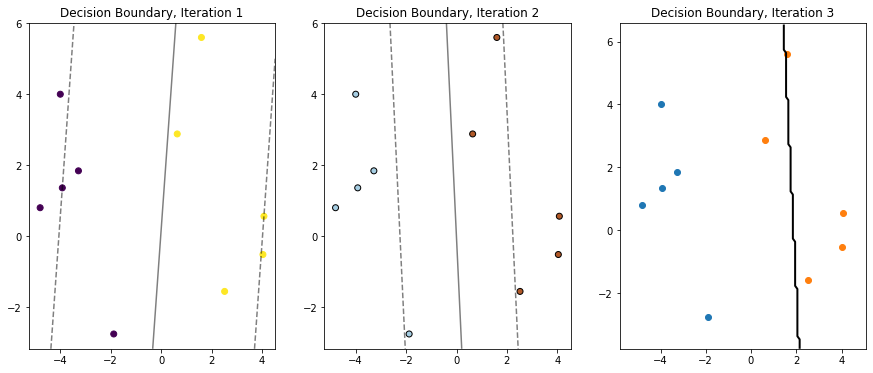

In [22]:
# Data points and labels
X = data_q1
y = np.array([1 if i==1 else -1 for i in labels_q1])

# Initialize parameters
m, n = X.shape
alphas = np.zeros(m)
b = 1
tol = 0.001
C = float('inf')
passes = 0
max_passes = 10

# Define kernel
def lin_kernel(x1, x2):
    return np.dot(x1, x2)

# Compute decision boundary
def dec_fn(alphas, X, y, x, b):
    return np.sum(alphas * y * lin_kernel(X, x)) + b

# Define clipping
def clip(alpha, H, L):
    if alpha > H:
        alpha = H
    if alpha < L:
        alpha = L
    return alpha

# Performing 1st iteration of the SMO algorithm
i = 0
j = 1
Ei = dec_fn(alphas, X, y, X[i], b) - y[i]
Ej = dec_fn(alphas, X, y, X[j], b) - y[j]
alpha_i_old, alpha_j_old = alphas[i], alphas[j]
if y[i] != y[j]:
    L = max(0, alphas[j] - alphas[i])
    H = min(C, C + alphas[j] - alphas[i])
else:
    L = max(0, alphas[i] + alphas[j] - C)
    H = min(C, alphas[i] + alphas[j])
if L == H:
    pass
eta = 2 * lin_kernel(X[i], X[j]) - lin_kernel(X[i], X[i]) - lin_kernel(X[j], X[j])
if eta >= 0:
    pass
alphas[j] -= y[j] * (Ei - Ej) / eta
alphas[j] = clip(alphas[j], H, L)
if abs(alphas[j] - alpha_j_old) < tol:
    alphas[j] = alpha_j_old
alphas[i] += y[i] * y[j] * (alpha_j_old - alphas[j])
b1 = b - Ei - y[i] * (alphas[i] - alpha_i_old) * lin_kernel(X[i], X[i]) - y[j] * (alphas[j] - alpha_j_old) * lin_kernel(X[i], X[j])
b2 = b - Ej - y[i] * (alphas[i] - alpha_i_old) * lin_kernel(X[i], X[j]) - y[j] * (alphas[j] - alpha_j_old) * lin_kernel(X[j], X[j])
if alphas[i] > 0 and alphas[i] < C:
    b = b1
elif alphas[j] > 0 and alphas[j] < C:
    b = b2
else:
    b = (b1 + b2) / 2

plt.figure(figsize=(15,6))

plt.subplot(131)
plt.title('Decision Boundary, Iteration 1')    
    
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = np.zeros_like(xy[:, 0])
for i in range(len(xy)):
    Z[i] = dec_fn(alphas, X, y, xy[i], b)

Z = Z.reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# plt.show()

# Perform iteration 2 of SMO algorithm
i = 2
j = 3
Ei = dec_fn(alphas, X, y, X[i], b) - y[i]
Ej = dec_fn(alphas, X, y, X[j], b) - y[j]
alpha_i_old, alpha_j_old = alphas[i], alphas[j]
if y[i] != y[j]:
    L = max(0, alphas[j] - alphas[i])
    H = min(C, C + alphas[j] - alphas[i])
else:
    L = max(0, alphas[i] + alphas[j] - C)
    H = min(C, alphas[i] + alphas[j])
if L == H:
    pass
eta = 2 * lin_kernel(X[i], X[j]) - lin_kernel(X[i], X[i]) - lin_kernel(X[j], X[j])
if eta >= 0:
    pass
alphas[j] -= y[j] * (Ei - Ej) / eta
alphas[j] = clip(alphas[j], H, L)
if abs(alphas[j] - alpha_j_old) < tol:
    alphas[j] = alpha_j_old
alphas[i] += y[i] * y[j] * (alpha_j_old - alphas[j])
b1 = b - Ei - y[i] * (alphas[i] - alpha_i_old) * lin_kernel(X[i], X[i]) - y[j] * (alphas[j] - alpha_j_old) * lin_kernel(X[i], X[j])
b2 = b - Ej - y[i] * (alphas[i] - alpha_i_old) * lin_kernel(X[i], X[j]) - y[j] * (alphas[j] - alpha_j_old) * lin_kernel(X[j], X[j])
if alphas[i] > 0 and alphas[i] < C:
    b = b1
elif alphas[j] > 0 and alphas[j] < C:
    b = b2
else:
    b = (b1 + b2) / 2

# Compute new decision boundary
w = np.sum(alphas * y * X.T, axis=1)
b = np.mean([dec_fn(alphas, X, y, x, b) - y for x, y in zip(X, y)])

# Plot data points and decision boundary
plt.subplot(132)
plt.title('Decision Boundary, Iteration 2')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = np.dot(xy, w) + b
Z = np.reshape(Z, xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plt.show()

# Compute final decision boundary function
w = np.sum(alphas.reshape(-1, 1) * y.reshape(-1, 1) * X, axis=0)
b = 1/y[0] - np.dot(w, X[0])

# Plot data points and decision boundary
plt.subplot(133)
plt.title('Decision Boundary, Iteration 3')
plt.scatter(X[y==-1, 0], X[y==-1, 1], label='Class C1')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class C2')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.savefig('./outputs/plot_1b.jpeg')
plt.show()

## ---------------------------- QUESTION 2 ----------------------------

In [6]:
## load the larger dataset from homework 1
with open('./data/data_old.txt') as f:
    data_old = f.readlines()
    f.close()

In [7]:
def format_data(data_old):
    """
    format the dataset into numpy arrays of features and labels
    
    Parameters
    ----------
    data_old - list of strings
    
    Returns
    -------
    feat_array - numpy array of features
    label_array - numpy array of labels
    """
    feat_array = []
    label_array = []
    
    for row in data_old:
        ## Splitting the string using comma separator and removing the newline character
        data_list = row.replace(',\n','').strip().split(",")

        ## Converting the first 4 elements to a numpy array of floats
        feat_array.append([float(i) for i in data_list[:4]])

        ## Converting the 5th element to a numpy array of strings
        label_array.append(data_list[4].replace("'", ""))
        
    return np.array(feat_array), np.array(label_array)

In [8]:
features, labels = format_data(data_old)

In [9]:
def train_test_split(features, labels):
    """
    split the dataset into train-test as specified in the problem statement
    considering the first 6 values of each material type to make the testing dataset
    rest of the data is training dataset
    
    Parameters
    ----------
    features - numpy array of floats
    labels - numpy array of strings
    
    Returns
    -------
    train_features - numpy array of floats
    test_features - numpy array of floats
    train_labels - numpy array of strings
    test_labels - numpy array of strings
    
    """
    # Get unique labels
    unique_labels = np.unique(labels)

    # Initialize train and test data
    train_features, test_features, train_labels, test_labels = [], [], [], []

    # Loop through each label
    for label in unique_labels:
        # Get indices of occurrences of the label in the labels array
        label_indices = np.where(labels == label)[0]
        # Pick the first 6 occurrences for test and the rest for train
        test_indices = label_indices[:6]
        train_indices = label_indices[6:]
        # Append the corresponding features and labels to the train and test sets
        test_features.append(features[test_indices])
        test_labels.append(labels[test_indices])
        train_features.append(features[train_indices])
        train_labels.append(labels[train_indices])
        
    # Concatenate the train and test sets
    train_features = np.concatenate(train_features, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_features = np.concatenate(test_features, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
        
    return train_features, test_features, train_labels, test_labels

In [10]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [11]:
def model_svm_iters(train_features, 
                    test_features, 
                    train_labels, 
                    test_labels, 
                    c_list = [1,10,100,200],
                    kernal = 'linear',
                    gamma = 'scale',
                    perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}
                    ):
    """
    Parameters
    ----------
    train_features - numpy array of floats
    test_features - numpy array of floats
    train_labels - numpy array of strings
    test_labels - numpy array of strings
    c_list - list of integers
    kernal - 'linear' or 'rbf' or 'poly'
    perf_comp - dictionary to solve the model, configuration, training and testing accuracies for comparison
    
    Returns
    -------
    perf_comp - dictionary with saved model, configuration, training and testing accuracies to compare later
    
    """
    print(f'Performance comparison for {kernal} kernal SVM\n')
    
    # Train the SVM model with a non-zero regularization weight C
    for c in c_list:
        if kernal == 'rbf':
            # train the SVM model with Gaussian Kernels
            clf = SVC(kernel='rbf', C=c, gamma='scale')
        else:
            clf = SVC(kernel='linear', C=c)
            
        clf.fit(train_features, train_labels)
        
        # Test the model on the testing set and calculate the classification accuracy
        y_pred_train = clf.predict(train_features)
        y_pred_test = clf.predict(test_features)

        accuracy_train = 100*(np.mean(train_labels == y_pred_train))
        accuracy_test = 100*(np.mean(test_labels == y_pred_test))
        
        print('For C = {} -----'.format(c))
        print('Training Accuracy: {}%'.format(round(accuracy_train,2)))
        print('Testing Accuracy: {}%\n'.format(round(accuracy_test,2)))
        
        perf_comp['model'].append(clf)
        perf_comp['c'].append(c)
        perf_comp['acc_train'].append(accuracy_train)
        perf_comp['acc_test'].append(accuracy_test)
    
    return perf_comp

## ------------------------------------ QUESTION 2-A ------------------------------------

Following are the steps:

- Load the dataset and split it into training and testing sets (DONE ALREADY).
- Train the SVM model on the training set.
- Test the model on the testing set and calculate the classification accuracy.
- Visualize the decision boundary and the support vectors.

In [12]:
print('------------------------------------ QUESTION 2-A ------------------------------------')

------------------------------------ QUESTION 2-A ------------------------------------


In [ ]:
## data edit for this question
train_labels_edit = [i if i=='Plastic' else 'Other' for i in train_labels]
test_labels_edit = [i if i=='Plastic' else 'Other' for i in test_labels]

In [ ]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,50,100], 
                            kernal='linear',
                            gamma=None,
                            perf_comp=perf_comp)

### OBSERVATION - 
- As we can see, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 10.__
- We can clearly see that for C = 50, 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.

In [ ]:
print(perf_comp['acc_train'])
print(perf_comp['acc_test'])

In [ ]:
## choose the best model
clf = perf_comp['model'][2]

In [ ]:
is_plastic = np.array(train_labels_edit).ravel()=='Plastic'
is_other = np.array(train_labels_edit).ravel()=='Other'

In [ ]:
# Plotting 2D projections of data and decision boundary
plt.figure(figsize=(15,6))
plt.suptitle("Linear SVM decision boundary")

plt.subplot(131)
plt.title('Height vs Diameter')

w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.array([train_features[:,0].min(),train_features[:,0].max()])
yy = a*xx - (clf.intercept_[0])/w[1]
plt.plot(xx,yy,"b-")
# Plot data points
plt.plot(train_features[:,0][is_plastic], train_features[:,1][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,1][is_other], "ro",label="not plastic")


plt.subplot(132)
plt.title('Height vs Weight')

w = clf.coef_[0]
a = -w[0]/w[2]
xx = np.array([train_features[:,0].min(),train_features[:,0].max()])
yy = a*xx - (clf.intercept_[0])/w[2]
plt.plot(xx,yy,"b-")

# Plot data points
plt.plot(train_features[:,0][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,2][is_other], "ro",label="not plastic")


plt.subplot(133)
plt.title('Diameter vs Weight')

w = clf.coef_[0]
a = -w[1]/w[2]
xx = np.array([train_features[:,1].min(),train_features[:,1].max()])
yy = a*xx - (clf.intercept_[0])/w[2]
plt.plot(xx,yy,"b-")

# Plot data points
plt.plot(train_features[:,1][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,1][is_other], train_features[:,2][is_other], "ro",label="not plastic")

plt.savefig("./outputs/lin_svm_clf.jpeg")
plt.show()

## ------------------------------------ QUESTION 2-B ------------------------------------

In [ ]:
print('------------------------------------ QUESTION 2-B ------------------------------------')

In [ ]:
perf_comp = {'model':[],'c':[],'acc_train':[],'acc_test':[]}

perf_comp = model_svm_iters(train_features, 
                            test_features, 
                            train_labels_edit, 
                            test_labels_edit, 
                            c_list=[1,5,10,20,50,100], 
                            kernal='rbf',
                            gamma='scale',
                            perf_comp=perf_comp)

In [ ]:
print(perf_comp['acc_train'])
print(perf_comp['acc_test'])

In [ ]:
## choose the best model
clf_nl = perf_comp['model'][4]

In [ ]:
plt.figure(figsize=(15,6))
plt.suptitle("Non-Linear (rbf) SVM decision boundary")

ax_pt_1 = np.linspace(train_features[:,0].min(), train_features[:,0].max(), 100).T
ax_pt_2 = np.linspace(train_features[:,1].min(), train_features[:,1].max(), 100).T
ax_pt_3 = np.linspace(train_features[:,2].min(), train_features[:,2].max(), 100).T
ax_pt_4 = np.linspace(train_features[:,3].min(), train_features[:,3].max(), 100).T

p1, p2 = np.meshgrid(ax_pt_1, ax_pt_2)
p3, p4 = np.meshgrid(ax_pt_3, ax_pt_4)

X_list = [p1,p2,p3,p4] 
value = np.zeros(p1.shape)

for i in range(p1.shape[1]):
    this_X = np.column_stack((p1[:, i], p2[:, i],p3[:,i],p4[:,i]))
    pred_nl = [1 if i=='Plastic' else -1 for i in clf_nl.predict(this_X)]
    value[:, i] = np.array(pred_nl)

plt.subplot(131)
plt.title('Height vs Diameter')

plt.contour(X_list[0], X_list[1], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,0][is_plastic], train_features[:,1][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,1][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.subplot(132)
plt.title('Height vs Weight')

plt.contour(X_list[0], X_list[2], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,0][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,0][is_other], train_features[:,2][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.subplot(133)
plt.title('Diameter vs Weight')

plt.contour(X_list[1], X_list[2], value, colors="b",levels=[-1,0,1])
# Plot data points.
plt.plot(train_features[:,1][is_plastic], train_features[:,2][is_plastic], "go",label="plastic")
plt.plot(train_features[:,1][is_other], train_features[:,2][is_other], "ro",label="not plastic")
plt.legend(loc="lower right")

plt.savefig("./outputs/non_lin_svm_clf.jpeg")
plt.show()

### OBSERVATIONS - 
- As expected and observed earleir, while increasing the regularization weight value of C we see an increase in the model accuracy.

- I have experimented by varying the C value to __1, 5, 10, 20, 50, and 100.__

- After a little while, the accuracy stops increasing with increasing value of C.
- In this example - the __saturation point is at C = 50.__
- We can clearly see that for C = 100; the model performance is not affected.

- Also, the model does not appear to be overfitting as the training and testing accuracies are consistent.

## ------------------------------------ QUESTION 3-A ------------------------------------

Submitted as a seperate file

In [ ]:
print('------------------------------------ QUESTION 3-A ------------------------------------')
print('Submitted as a seperate file \n')

## ------------------------------------ QUESTION 3-B ------------------------------------

In [ ]:
print('------------------------------------ QUESTION 3-B ------------------------------------')

In [ ]:
import numpy as np

def calc_entropy(y):
    """
    Calculates the entropy of a label array.
    """
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return -np.sum(probs * np.log2(probs))

def information_gain(X, y, feature_index, thresh):
    """
    Calculates the information gain of a split on a given feature and thresh.
    """
    l_mask = X[:, feature_index] <= thresh
    r_mask = X[:, feature_index] > thresh
    l_y, r_y = y[l_mask], y[r_mask]
    l_entropy, r_entropy = calc_entropy(l_y), calc_entropy(r_y)
    l_size, r_size = len(l_y), len(r_y)
    total_entropy = (l_size / len(y)) * l_entropy + (r_size / len(y)) * r_entropy
    return calc_entropy(y) - total_entropy

def find_best_split(X, y):
    """
    Finds the best feature and thresh to split the data.
    """
    best_feature_index, best_thresh, best_info_gain = None, None, -1
    for feature_index in range(X.shape[1]):
        unique_values = np.unique(X[:, feature_index])
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2
        for thresh in thresholds:
            info_gain = information_gain(X, y, feature_index, thresh)
            if info_gain > best_info_gain:
                best_feature_index, best_thresh, best_info_gain = feature_index, thresh, info_gain
    return best_feature_index, best_thresh

def build_tree(X, y, depth=0, max_depth=None):
    """
    Builds a decision tree recursively.
    """
    if depth == max_depth or len(np.unique(y)) == 1:
        return np.bincount(y).argmax()
    feature_index, thresh = find_best_split(X, y)
    l_mask = X[:, feature_index] <= thresh
    r_mask = X[:, feature_index] > thresh
    l_subtree = build_tree(X[l_mask], y[l_mask], depth+1, max_depth)
    r_subtree = build_tree(X[r_mask], y[r_mask], depth+1, max_depth)
    return (feature_index, thresh, l_subtree, r_subtree)
    
def predict(tree, example):
    """Predicts the labels of an array of single data point using a decision tree."""
    if type(tree) == tuple:
        attribute, thresh, l_subtree, r_subtree = tree
        if example[attribute] <= thresh:
            return predict(l_subtree, example)
        else:
            return predict(r_subtree, example)
    else:
        return tree

def predict_all(tree, X):
    """Predicts the labels of an array of data points using a decision tree."""
    y_pred = []
    for example in X:
        y_pred.append(predict(tree, example))
    return y_pred

## ------------------------------------ QUESTION 3-C ------------------------------------

In [ ]:
print('------------------------------------ QUESTION 3-C ------------------------------------')

In [ ]:
def labels_str_to_int(labels):
    """
    convert string labels to integer to pass to the decision tree classifier
    
    Parameters
    ----------
    labels - numpy array of strings
    
    Returns
    -------
    labels_int - numpy array of integers
    """
    labels_int = []
    for i in labels:
        if i=='Plastic':
            labels_int.append(0)
        elif i=='Ceramic':
            labels_int.append(1)
        elif i=='Metal':
            labels_int.append(2)
        
    return np.array(labels_int)

In [ ]:
train_labels_int = labels_str_to_int(train_labels)
test_labels_int = labels_str_to_int(test_labels)

In [ ]:
perf_comp_dt = {'model':[],'max_depth':[],'acc_train':[],'acc_test':[]}

"""
Iterating the max_depth through 1 to 8 as required in the problem
Later, we can compare the model performance based on various depth levels
to see which depth level is best performing for the given dataset
and if the model is overfitting as we increase the depth
"""

for max_depth in range(1,9):
    dec_tree = build_tree(train_features, train_labels_int, max_depth=max_depth)

    pred_train = predict_all(dec_tree, train_features)
    acc_train = 100*np.mean(pred_train == train_labels_int)
    
    pred_test = predict_all(dec_tree, test_features)
    acc_test = 100*np.mean(pred_test == test_labels_int)
    
    perf_comp_dt['model'].append(dec_tree)
    perf_comp_dt['max_depth'].append(max_depth)
    perf_comp_dt['acc_train'].append(acc_train)
    perf_comp_dt['acc_test'].append(acc_test)

In [ ]:
for i in zip(perf_comp_dt['acc_train'], perf_comp_dt['acc_test'], perf_comp_dt['max_depth']):
    print(f'For Max Depth = {i[2]}, training accuracy = {round(i[0],2)}, testing accuracy = {round(i[1],2)}')

### ------------ CONCLUSION ------------

- As expected, while increasing the max depth, the training as well as testing accuracies increase.
- After some time, at max depth level 6, the increase in training accuracy and testing accuracy is relatively slower.
- We can also observe that for max depths 2,3,4,5 the testing accuracies are consistent.
- This can mean that the features at these depths are not learning meaningful information for testing data.
- Finally, the model seems to learn well at max_depth of 6 and 7 and does not appear to be overfitting as the training and testing accuracies are consistent with each other.